# Isochrones
An isochrone map in geography and urban planning is a map that depicts the area accessible from a point within a certain time threshold.[1] An isochrone (iso = equal, chrone = time).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm

In [2]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/set_19/set19_100.zarr/')
sim = sim.compute()

In [3]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Distancedisplacement.svg/2560px-Distancedisplacement.svg.png" alt="drawing" width="400"/>


## Displacement $s(t)$

$$s(t) = |\vec{x}(t) - \vec{x}_0|$$


## Distance $d(t)$

$$d(t; \vec{x_0})$$


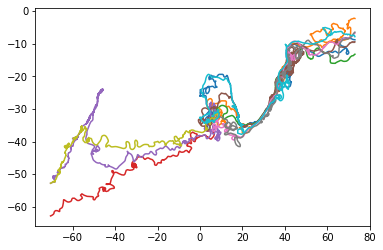

In [4]:
for i in range(10):
    plt.plot(sim['lon'][i,:], sim['lat'][i,:])

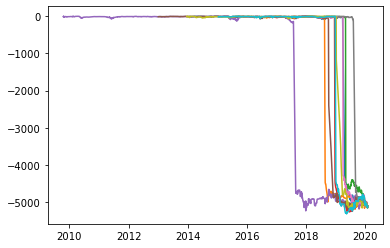

In [5]:
for i in range(10):
    plt.plot(sim['time'][i,:], -sim['z'][i,:])

In [6]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

# Diameter

In [7]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/set_19/set19_100.zarr/')
sim = sim.compute()

In [8]:
sim.dims['obs']

4860

In [9]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

In [10]:
sim['time'][0,:]

<xarray.DataArray 'time' (obs: 4860)>
array(['2020-01-30T12:00:00.000000000', '2020-01-29T12:00:00.000000000',
       '2020-01-28T12:00:00.000000000', ...,
                                 'NaT',                           'NaT',
                                 'NaT'], dtype='datetime64[ns]')
Dimensions without coordinates: obs
Attributes:
    axis:           T
    long_name:      
    standard_name:  time

In [11]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/set_19/set19_100.zarr/')
sim = sim.compute()

observations = sim.dims['obs']
time = sim['time'][0,:]
mean_diameter = np.zeros(observations)
std_diameter = np.zeros(observations)
mean_SA = np.zeros(observations)
std_SA = np.zeros(observations)

for dt in range(observations):
    diameters  = sim['diameter'][:, dt]
    SA = 6*diameters**2
    mean_diameter[dt] = np.mean(diameters)
    std_diameter[dt] = np.std(diameters)
    mean_SA[dt] = np.mean(SA)
    std_SA[dt] = np.std(SA)


In [12]:
observations = sim.dims['obs']
time = sim['time'][0,:]
mean_diameter = np.zeros(observations)
std_diameter = np.zeros(observations)
mean_SA = np.zeros(observations)
std_SA = np.zeros(observations)

for dt in range(observations):
    diameters  = sim['diameter'][:, dt]
    SA = 6*diameters**2
    mean_diameter[dt] = np.mean(diameters)
    std_diameter[dt] = np.std(diameters)
    mean_SA[dt] = np.mean(SA)
    std_SA[dt] = np.std(SA)


In [13]:
mean_diameter

array([5.05000412e-08, 5.36258864e-08, 5.68427117e-08, ...,
                  nan,            nan,            nan])

Text(0, 0.5, 'Surface Area ($m^2$)')

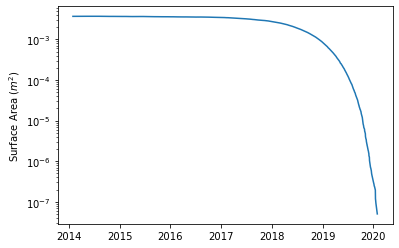

In [14]:
plt.plot(time, mean_diameter)
plt.semilogy()
plt.ylabel(r'Surface Area ($m^2$)')

In [15]:
plt.plot(time, mean_diametereter)
plt.semilogy()
plr.plot()

NameError: name 'mean_diametereter' is not defined

In [ ]:
plt.plot(time, mean_diameter)
plt.fill_between(time, mean_diameter - std_diameter, mean_diameter + std_diameter, alpha=0.3)
# plt.semilogy()

In [80]:
mean_SA

<xarray.DataArray 'diameter' ()>
array(nan)

ValueError: x and y must have same first dimension, but have shapes (4860,) and (1,)

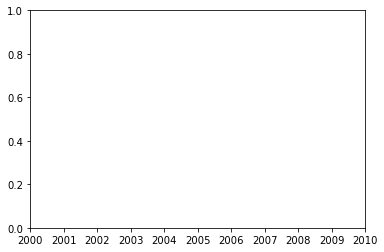

In [79]:
plt.plot(time, mean_SA)
# plt.fill_between(time, mean_diameter - std_diameter, mean_diameter + std_diameter, alpha=0.3)
# plt.semilogy()

ValueError: x and y must have same first dimension, but have shapes (4860,) and (1,)

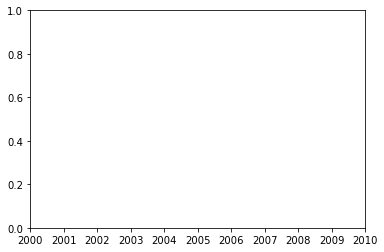

In [66]:
plt.plot(time, mean_SA)
# plt.fill_between(time, mean_diameter - std_diameter, mean_diameter + std_diameter, alpha=0.3)
# plt.semilogy()

In [4]:
def haversine(coord1: object, coord2: object):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)** 2 + np.cos(phi_1)*np.cos(phi_2)*np.sin(delta_lambda/2.0)**2
    
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R*c  # output distance in meters
    
    return meters

In [5]:
position = (sim['lon'][:,:].values, sim['lat'][:,:].values)
origin = (sim['lon'][0,:].values, sim['lat'][0,:].values)

s = haversine(origin, position) 

In [6]:
sim['lon'][:,1:].values.shape

(10000, 4859)

In [7]:
x = (sim['lon'][:,:-1].values, sim['lat'][:,:-1].values)
x_shift = (sim['lon'][:,1:].values, sim['lat'][:,1:].values)

dx = haversine(x, x_shift)
distance = np.cumsum(dx, axis=1)

In [8]:
dx[:,0]

array([5236.14138489, 4108.50450707, 6347.04669021, ..., 4477.61699725,
       4063.49813574, 4884.29806855])

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

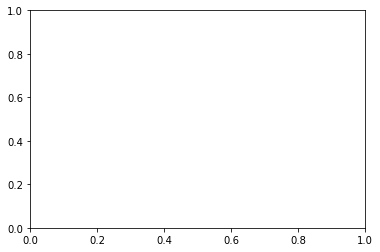

In [9]:
plt.hist(s[:, 1000]/1e3, label='Displacement')
plt.xlabel('Kilometers')

In [ ]:
plt.plot(distance[0, :]/1e3, label='dist')
plt.plot(distance[1000, :]/1e3, label='s')
plt.legend()

In [ ]:
plt.plot(s[1, :]/1e3, label='s')
plt.plot(s[1000, :]/1e3, label='s')
plt.legend()

In [13]:
def filter_trajectories(data, condition):
    k, _ = np.where(condition)
    index = np.unique(k)
    
    data_relevant = data.where(data['trajectory'].isin(index), drop=True)

    return data_relevant

In [14]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float64 1.0 1.0 1.0 ... -2.147e+09 -2.147e+09
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

In [15]:
nano = sim.where(sim.diameter < 1e-6, drop=True)

In [16]:
nano

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 214)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float64 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

(array([  0.,   0.,   0.,   0.,   0., 300.,   0.,   0.,   0.,   0.]),
 array([ 9.95692892, 10.05692892, 10.15692892, 10.25692892, 10.35692892,
        10.45692892, 10.55692892, 10.65692892, 10.75692892, 10.85692892,
        10.95692892]),
 <BarContainer object of 10 artists>)

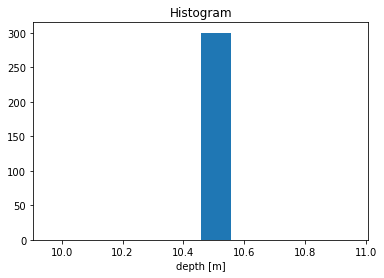

In [17]:
sim.isel(obs=slice(900,1200),traj=1).z.plot.hist()

In [18]:
da = nano.isel(traj=1)

In [19]:
nano_zfilter = nano.where(nano.z>100)

In [47]:
w = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2021-11-27.nc')

In [63]:
vertical_bins = -w['depthw'].values[::-1]

In [64]:
vertical_bins

array([-5.50000146e+03, -5.05247412e+03, -4.61746240e+03, -4.19681592e+03,
       -3.79247363e+03, -3.40640186e+03, -3.04051538e+03, -2.69658252e+03,
       -2.37612305e+03, -2.08030859e+03, -1.80988000e+03, -1.56509058e+03,
       -1.34568701e+03, -1.15092847e+03, -9.79643372e+02, -8.30311890e+02,
       -7.01165771e+02, -5.90290100e+02, -4.95718384e+02, -4.15511902e+02,
       -3.47821594e+02, -2.90930267e+02, -2.43278076e+02, -2.03473526e+02,
       -1.70293854e+02, -1.42677887e+02, -1.19714096e+02, -1.00626091e+02,
       -8.47572784e+01, -7.15555344e+01, -6.05588074e+01, -5.13819351e+01,
       -4.37048988e+01, -3.72624855e+01, -3.18353996e+01, -2.72426338e+01,
       -2.33349934e+01, -1.99896641e+01, -1.71056423e+01, -1.45999317e+01,
       -1.24043722e+01, -1.04630241e+01, -8.72999573e+00, -7.16765165e+00,
       -5.74513674e+00, -4.43716145e+00, -3.22300124e+00, -2.08567595e+00,
       -1.01127517e+00, -0.00000000e+00])

In [66]:
len(vertical_bins)

50

In [71]:
time = sim['time'][0,:4856]#np.linspace(0, 4855, 4856)

In [78]:
statz = {}
counts = {}
dist = {}
time_dim = 4856
vertical_bins = -w['depthw'].values[::-1]
N_bins = len(vertical_bins)-1



for ft in tqdm([500,5000, 50000]):
    print(ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_17/set17_{ft}.zarr')
    sim = sim.compute()
    nano = sim.where(sim.diameter < 1e-6, drop=True)
    hist_counts = np.zeros((N_bins, time_dim))

    for i, fr in enumerate(range(0, time_dim, 1)):
    #     print(i)

        x = plt.hist(-nano['z'][:,fr].dropna('traj'), bins=vertical_bins, label = fr, density=False)
        hist_counts[:, i] = x[0]
        plt.close()
        

    total_particles = np.sum(hist_counts, axis=0)
    statz[ft] = hist_counts
    counts[ft] = total_particles


  0%|                                                     | 0/3 [00:00<?, ?it/s]

500


 33%|██████████████▋                             | 1/3 [03:53<07:47, 233.98s/it]

5000


 67%|█████████████████████████████▎              | 2/3 [07:33<03:45, 225.58s/it]

50000


100%|████████████████████████████████████████████| 3/3 [11:27<00:00, 229.05s/it]


/tmp/ipykernel_305148/4148248317.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[2].pcolormesh(x, y, a/counts[500], cmap=color_map, vmin = 0, vmax=0.5)
/tmp/ipykernel_305148/4148248317.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im3 = ax[3].pcolormesh(x, y, c/counts[5000], cmap=color_map, vmin = 0, vmax=0.5)
/tmp/ipykernel_305148/4148248317.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C i

Text(0.5, 1.0, 'Nanoparticles (50-1000 $nm$) in the water column')

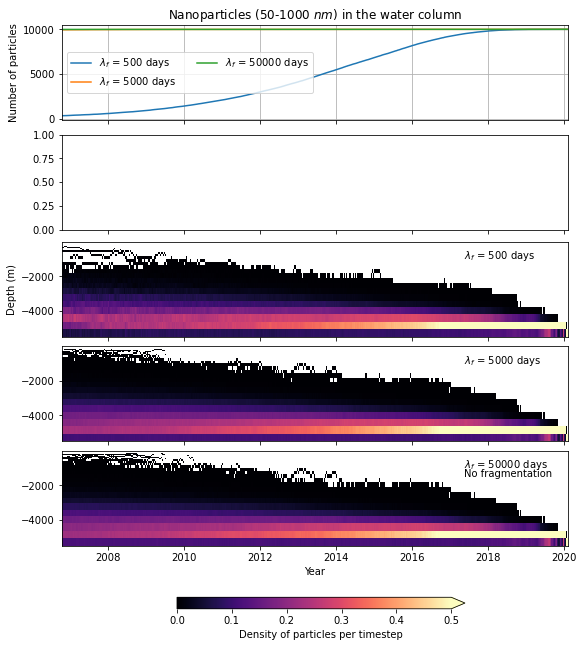

In [87]:
x, y = np.meshgrid(time, vertical_bins[0:-1])

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(8, 8),
                       sharex=True, constrained_layout=True)

for ft in [500, 5000, 50000]:
    ax[0].plot(time, counts[ft],label=f'$\lambda_f$ = {ft} days')
ax[0].legend(ncol=2, loc='center left')
    
ax[0].set_ylabel('Number of particles')
# ax[1].set_ylabel('Number of particles')  
ax[2].set_ylabel('Depth (m)')  
ax[4].set_xlabel('Year') 
ax[0].grid()

color_map = 'magma'



a = np.ma.masked_equal(statz[500], 0)
im1 = ax[2].pcolormesh(x, y, a/counts[500], cmap=color_map, vmin = 0, vmax=0.5)
ax[2].text(17300, -1000, '$\lambda_f$ = 500 days')

# b = np.ma.masked_equal(statz[2500], 0)
# im2= ax[2].pcolormesh(x, y, b/counts[2500], cmap=color_map, vmin = 0, vmax=0.2)
# ax[2].text(17300, -1000, '$\lambda_f$ = 2500 days')


c = np.ma.masked_equal(statz[5000], 0)
im3 = ax[3].pcolormesh(x, y, c/counts[5000], cmap=color_map, vmin = 0, vmax=0.5)
ax[3].text(17300, -1000, '$\lambda_f$ = 5000 days')

d = np.ma.masked_equal(statz[50000], 0)
im4 = ax[4].pcolormesh(x, y, d/counts[50000], cmap=color_map, vmin = 0, vmax=0.5)
ax[4].text(17300, -1000, '$\lambda_f$ = 50000 days')
ax[4].text(17300, -1500, 'No fragmentation')

bar_ax = fig.add_axes([0.3, -0.05, 0.5, 0.02])
# ax[5].axis('off')
cbar = fig.colorbar(im3, cax=bar_ax, orientation='horizontal',extend='max', label='Density of particles per timestep')
# ax[0].pcolormesh(x, y, -hist_counts, cmap='viridis')
ax[0].set_title('Nanoparticles (50-1000 $nm$) in the water column')
# plt.savefig('../figs/frag_t_Vdist_nano.png', dpi=300)

In [89]:
plt.hexbin()

TypeError: hexbin() missing 2 required positional arguments: 'x' and 'y'

In [97]:
age = 10
particulas = 10000
x = np.reshape(sim['lon'][:,:age].values, particulas*age)
y = np.reshape(sim['lat'][:,:age].values, particulas*age)
np.histogram2d(x,y, bins=2)

(array([[ 6498., 34002.],
        [33601., 25899.]]),
 array([5.70144455, 6.01323058, 6.3250166 ]),
 array([-32.21546632, -32.05788529, -31.90030425]))

AttributeError: 'DataArray' object has no attribute 'range'

In [ ]:
domain_limits = [[-73, 25], [-80, 0]]
number_bins = (98, 80)

In [108]:
bins

NameError: name 'bins' is not defined

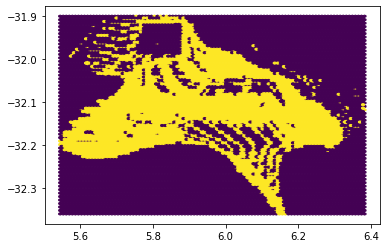

In [107]:
age = 30
particulas = 10000
x = sim['lon'][:,:age].values
y = sim['lat'][:,:age].values
plt.hexbin(x, y, bins=2)

In [88]:
sim[]

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float64 1.0 1.0 1.0 ... -2.147e+09 -2.147e+09
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

/tmp/ipykernel_305148/764854673.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, b, cmap=color_map)


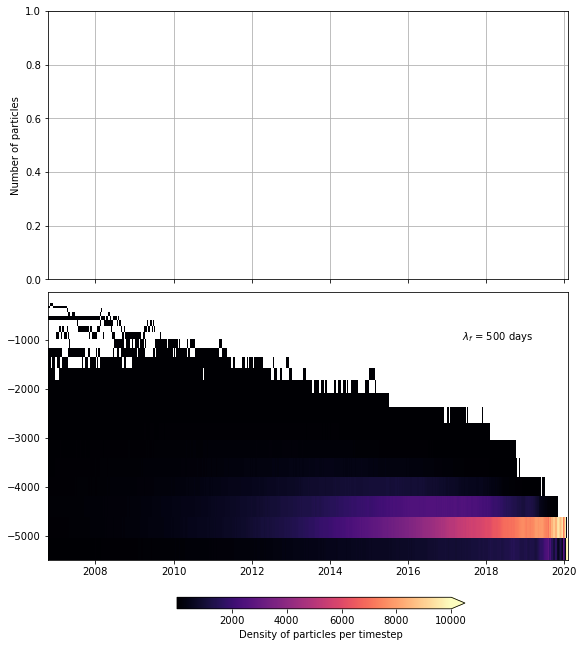

In [80]:
x, y = np.meshgrid(time, vertical_bins[0:-1])

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8, 8),
                       sharex=True, constrained_layout=True)

# for ft in [50, 500, 5000, 50000]:
#     ax[0].plot(time, counts[ft],label=f'$\lambda_f$ = {ft} days')
# ax[0].legend(ncol=2, loc='center left')
    
ax[0].set_ylabel('Number of particles')
# ax[1].set_ylabel('Number of particles')  
ax[0].grid()

color_map = 'magma'

b = np.ma.masked_equal(statz[500], 0)
im1 = ax[1].pcolormesh(x, y, b, cmap=color_map)
ax[1].text(17300, -1000, '$\lambda_f$ = 500 days')

bar_ax = fig.add_axes([0.3, -0.05, 0.5, 0.02])
# ax[5].axis('off')
cbar = fig.colorbar(im1, cax=bar_ax, orientation='horizontal',extend='max', label='Density of particles per timestep')

In [83]:
vertical_bins[0:-2].shape

(48,)

In [ ]:
np.histogram2d()